In [1]:
import matplotlib.pyplot as plt
from seaborn import heatmap
from seaborn import pairplot
from besos import eppy_funcs as ef
from besos import sampling
from besos.evaluator import EvaluatorEP
from besos.parameters import RangeParameter, FieldSelector, FilterSelector, Parameter, expand_plist, wwr, CategoryParameter, GenericSelector
from besos.problem import EPProblem
import pandas as pd
import numpy as np

in our project the u-value for both case of ventilation (on/off) is the same

In [3]:
building = ef.get_building('/home/ict4bd/Desktop/Project/IDF final/on.idf')
Materials = [material for material in building.idfobjects["MATERIAL"]]
Materials_NoMass = [materials for materials in building.idfobjects["material:NoMass"]]

In [4]:
# fixed values
ascExt = 0.04
ascInt = 0.1
horExt = 0.04
horInt = 0.13
desExt = 0.04
desInt = 0.17
condutivity_insulation = .034

To calculate U-Value

In [7]:
uValue_Wall_temp = []
for tick in np.linspace(0.001,0.35,10):    
    layer_wall = [6,7,8]    
    resistance = 0
    for i in layer_wall:    
        thickness_ = Materials[i].Thickness
        conductivity_ = Materials[i].Conductivity
        resistance += (thickness_/conductivity_)
    resistance += (tick/condutivity_insulation)
    U_val = (round(1/(horExt+horInt+resistance),4))
    uValue_Wall_temp.append({'U-Value': U_val,
                             'Thickness': tick})
uValue_Wall = pd.DataFrame.from_dict(uValue_Wall_temp)
uValue_Wall

,U-Value,Thickness
0,1.8280,0.001000
1,0.5926,0.039778
2,0.3536,0.078556
3,0.2520,0.117333
4,0.1957,0.156111
5,0.1600,0.194889
6,0.1353,0.233667
7,0.1172,0.272444
8,0.1034,0.311222
9,0.0925,0.350000


In [12]:
uValue_roof_temp = []
for tick in np.linspace(0.001,0.35,10):    
    layer_roof = [1,3]    
    resistance = 0
    for i in layer_roof:    
        thickness_ = Materials[i].Thickness
        conductivity_ = Materials[i].Conductivity
        resistance += (thickness_/conductivity_)
    resistance += (tick/condutivity_insulation)
    resistance += Materials_NoMass[1].Thermal_Resistance
    U_val = (round(1/(ascExt+ascInt+desInt+desExt+resistance),4))
    uValue_roof_temp.append({'U-Value': U_val,
                             'Thickness': tick})
uValue_roof = pd.DataFrame.from_dict(uValue_roof_temp)
uValue_roof

,U-Value,Thickness
0,1.5982,0.001000
1,0.5662,0.039778
2,0.3440,0.078556
3,0.2471,0.117333
4,0.1928,0.156111
5,0.1580,0.194889
6,0.1339,0.233667
7,0.1162,0.272444
8,0.1026,0.311222
9,0.0918,0.350000


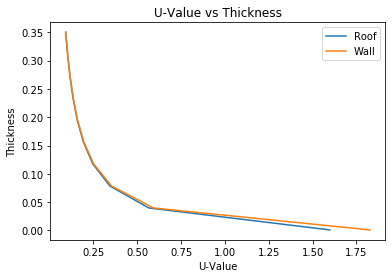

In [15]:
fig = plt.figure()
plt.plot(uValue_roof['U-Value'],uValue_roof['Thickness'],label='Roof')
plt.plot(uValue_Wall['U-Value'],uValue_Wall['Thickness'],label='Wall')

plt.xlabel('U-Value')
plt.ylabel('Thickness')
plt.title('U-Value vs Thickness')
plt.legend()
plt.show()